This notebook can be used to analyze titanic dataset and predict survival rate of the passengers.

In [36]:
import pandas as pd
import math
import statistics as stat
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from random import seed
from random import random
from random import randrange, uniform
import csv
from statistics import mean, stdev, median
from math import exp
import re

seed(0)

# Load data from CSV

In [37]:
training_data_filename = '/kaggle/input/titanic/train.csv'
titanic = pd.read_csv(training_data_filename)  
pd.set_option('precision', 2)  # format for floating-point values

# Data Summary

In [38]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [39]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


# Exploratory Data Analysis

In this section we are going to compare the features from the dataset with the actual survival value. This will help us in determining which features we can select to build the model.

In [7]:
titanic[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean()

,Sex,Survived
0,female,0.74
1,male,0.19


### Survival rate in each sex category 

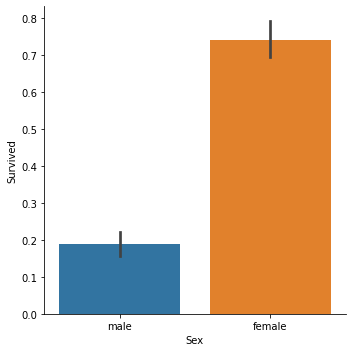

In [8]:
plot = sns.catplot(x="Sex", y ="Survived", data=titanic, kind="bar", height=5)
plt.show()

### Survival rate in Passenger class

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


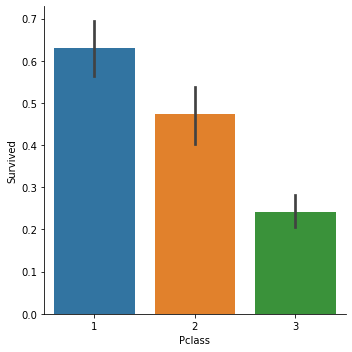

In [34]:
sns.factorplot(x="Pclass", y ="Survived", data=titanic, kind="bar", height=5)
plt.show()

### Survival rate based upon embarked source

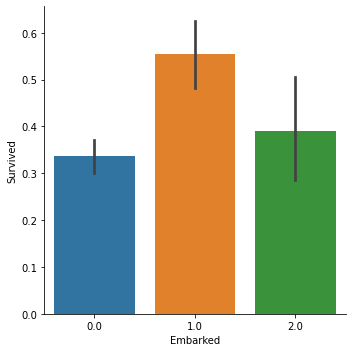

In [33]:
sns.catplot(x="Embarked", y ="Survived", data=titanic, kind="bar", height=5)
plt.show()

### Survival rate in case of siblings or spouse

In [ ]:
sns.catplot(x="SibSp", y ="Survived", data=titanic, kind="bar", size=5)
plt.show()

### Survival rate in case of Parent or children

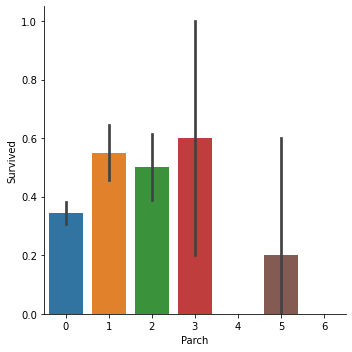

In [9]:
plot = sns.catplot(x="Parch", y ="Survived", data=titanic, kind="bar", height=5)
plt.show()

### Survival rate with respect to ticket price

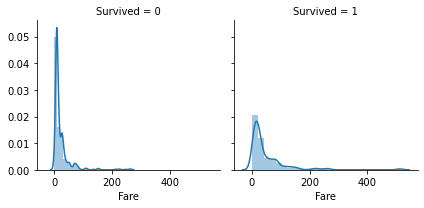

In [10]:
plot = sns.FacetGrid(titanic, col="Survived")
plot.map(sns.distplot, "Fare", bins=25)
plt.show()

### Survival rate of a Family

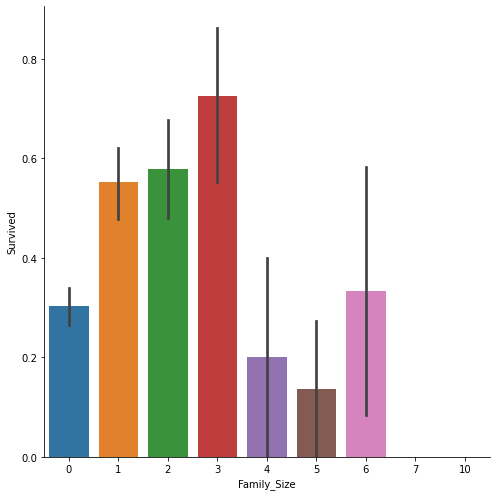

In [15]:
titanic["Family_Size"] = titanic["SibSp"] + titanic["Parch"]
plot = sns.catplot(x="Family_Size", y ="Survived", data=titanic, kind="bar", height=7)
plt.show()

### Survival rate of people with different titles

In [16]:
titanic['Title']=titanic.Name.str.extract('([A-Za-z]+)\.')

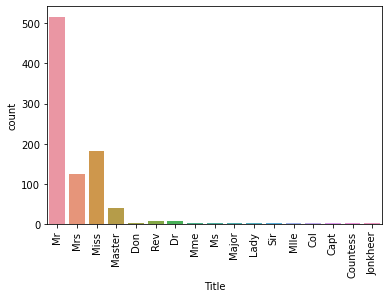

In [17]:
sns.countplot(titanic["Title"])
plt.xticks(rotation = 90)
plt.show()

In [18]:
titanic['Title'].replace(['Mme','Ms','Mlle','Lady','Countess','Dona','Dr','Major','Sir','Capt','Don','Rev','Col', 'Jonkheer'],['Miss','Miss','Miss','Mrs','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','NA','NA','NA'], inplace=True)

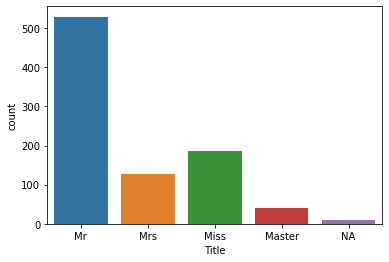

In [19]:
sns.countplot(titanic["Title"])
plt.show()

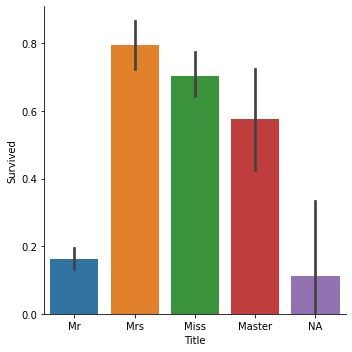

In [20]:
sns.catplot(x="Title", y ="Survived", data=titanic, kind="bar", height=5)
plt.show()

### Correlation of different features with each other

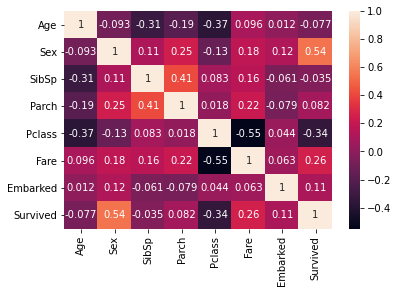

In [13]:
sns.heatmap(titanic[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked", "Survived"]].corr(), annot = True)
plt.show()


### Passenger count

In [22]:
passenger_count = len(titanic.Age)

good_ages = [Age for Age in titanic.Age if not math.isnan(Age)]
good_ages_count = len(good_ages)

mean_age = sum(good_ages)/good_ages_count

print(f'count of all  ages = {passenger_count}')
print(f'count of good ages = {good_ages_count}')
print(f' mean of good ages = {mean_age:.2f}')

count of all  ages = 891
count of good ages = 714
 mean of good ages = 29.70


### Age Statistical Analysis

In [23]:
print(f'stat.mean      = {stat.mean(good_ages):.2f}')
print(f'stat.median    = {stat.median(good_ages):.2f}')
print(f'stat.pvariance = {stat.pvariance(good_ages):.2f}')
print(f'stat.pstdev    = {stat.pstdev(good_ages):.2f}')

stat.mean      = 29.70
stat.median    = 28.00
stat.pvariance = 210.72
stat.pstdev    = 14.52


In [24]:
sorted_good_ages = sorted(good_ages)
print(f'len(sorted(good_ages)) = {len(sorted_good_ages)}')
min_age = sorted_good_ages[0]
max_age = sorted_good_ages[-1]

print(f'min of ages = {min_age:.2f}')
print(f'max of ages = {max_age:.2f}')

len(sorted(good_ages)) = 714
min of ages = 0.42
max of ages = 80.00


In [25]:
mid = good_ages_count//2

if good_ages_count%2 == 1:
    median_age = sorted_good_ages[mid+1]
else:
    median_age = (sorted_good_ages[mid] + sorted_good_ages[mid+1])/2
    
print(f'median of good ages = {median_age:.2f}')

median of good ages = 28.00


In [26]:
sum_of_squares = 0

for age in good_ages:
    sum_of_squares += (age - mean_age)**2
    
variance = sum_of_squares/good_ages_count
stdev    = math.sqrt(variance)

print(f'sum sqrs of ages = {sum_of_squares:.2f}')
print(f'variance of ages = {variance:.2f}')
print(f' std dev of ages = {stdev:.2f}')

sum sqrs of ages = 150456.64
variance of ages = 210.72
 std dev of ages = 14.52


#### Fare Statistical Analysis

In [53]:
passenger_count = len(titanic.Fare)

good_fares = [Fare for Fare in titanic.Fare if not math.isnan(Fare) or Fare > 0]
good_fares_count = len(good_fares)

mean_fare = sum(good_fares)/good_fares_count
median_fare = stat.median(good_fares)

print(f'count of all  fares = {passenger_count}')
print(f'count of good fares = {good_ages_count}')
print(f'mean of good fares = {mean_fare:.2f}')
print(f'stat.median    = {median_fare:.2f}')

count of all  fares = 891
count of good fares = 714
mean of good fares = 32.20
stat.median    = 14.45


In [54]:
print(f'stat.mean      = {stat.mean(good_fares):.2f}')
print(f'stat.median    = {stat.median(good_fares):.2f}')
print(f'stat.pvariance = {stat.pvariance(good_fares):.2f}')
print(f'stat.pstdev    = {stat.pstdev(good_fares):.2f}')

stat.mean      = 32.20
stat.median    = 14.45
stat.pvariance = 2466.67
stat.pstdev    = 49.67


### Pie Chart to show the number of passengers in each class

[216, 184, 491]
Count of passengers in each class


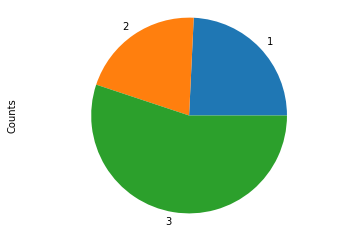

In [41]:
def class_survival(pClass, survived_status):
    survival_count = 0
    class_count = 0
    for survived, clazz in zip(titanic['Survived'], titanic['Pclass']):
        if clazz == pClass:
            class_count += 1
            if survived_status == survived:
                survival_count += 1
    return (survival_count, class_count)

class_1st_survival_count, class_1st_count = class_survival(1, 1)
class_2nd_survival_count, class_2nd_count = class_survival(2, 1)
class_3rd_survival_count, class_3rd_count = class_survival(3, 1)

print([class_1st_count, class_2nd_count, class_3rd_count])
print('Count of passengers in each class')

class_count_df = pd.DataFrame({'Pclass' : ['1', '2', '3'], 
                             'Counts' : [class_1st_count, class_2nd_count, class_3rd_count]})
class_count_df.Counts.groupby(class_count_df.Pclass).sum().plot(kind='pie')
plt.axis('equal')
plt.show()

### Pie chart to show the number of survived passengers in each class

[136, 87, 119]
Survival count of passengers in each class


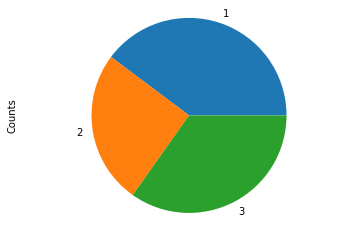

In [42]:
print([class_1st_survival_count, class_2nd_survival_count, class_3rd_survival_count])
print('Survival count of passengers in each class')

survival_class_count_df = pd.DataFrame({'Pclass' : ['1', '2', '3'], 'Counts' : [class_1st_survival_count, class_2nd_survival_count, class_3rd_survival_count]})
survival_class_count_df.Counts.groupby(survival_class_count_df.Pclass).sum().plot(kind='pie')
plt.axis('equal')
plt.show()

In [28]:
(titanic.Survived == 1).describe()

count       891
unique        2
top       False
freq        549
Name: Survived, dtype: object

### Box plot between age and Passenger Class

Box chart of age ranges by class


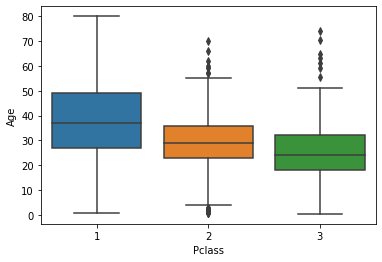

In [29]:
print('Box chart of age ranges by class')
boxplot = sns.boxplot(y='Age', x='Pclass', data=titanic)

### HISTOGRAM

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c340c0b10>,
      dtype=object)

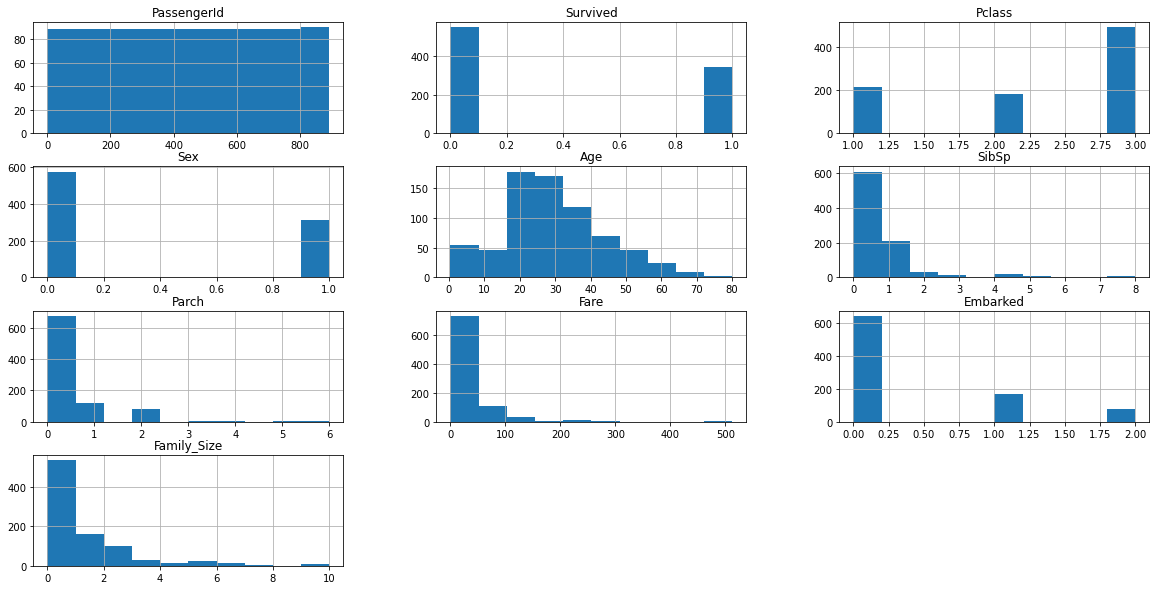

In [31]:
plt.rcParams["figure.figsize"] = (20,10)
titanic.hist()  # passenger age only

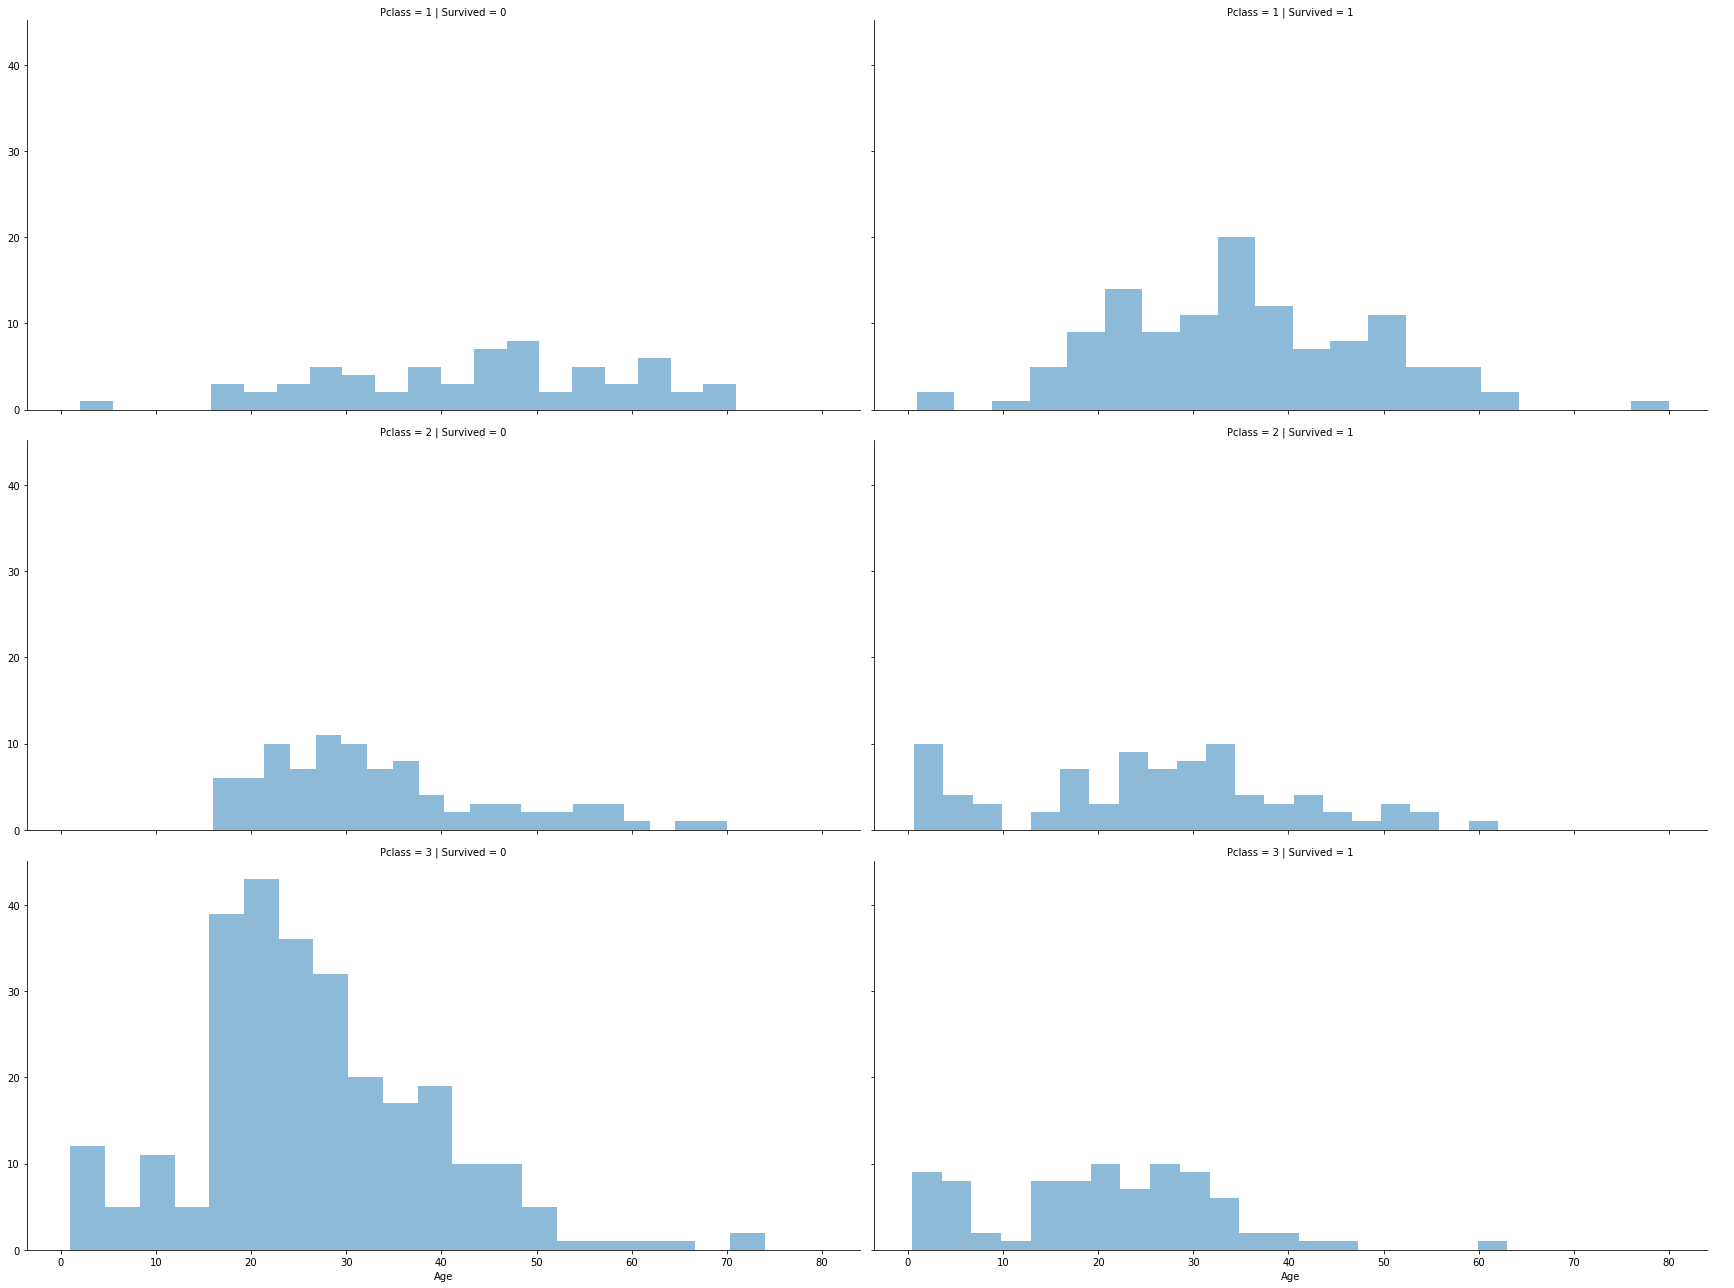

In [32]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', height=6, aspect=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Neural Network using backpropagation

### Functions to implement backpropagation

In [44]:
def read_csv_data(filename):
    with open(filename, mode='r') as file:
        reader = csv.reader(file, delimiter=',')
        df = []
        for row in reader:
            df.append(row)
    return df


# Searching the min and max values for each column:
def dataset_minmax(dataset):
    stats = []
    for column in zip(*dataset):
        stats.append([min(column), max(column)])
    return stats


# Create pipeline: Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row) - 1):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])


# Get k folds from the dataset for cross validation
def get_k_folds(data, num_folds):
    split_data = []
    duplicate_data = data[:]
    size = int(len(data) / num_folds)
    for i in range(num_folds):
        fold = []
        j = 0
        for j in range(size):
            index = randrange(len(duplicate_data))
            fold.append(duplicate_data.pop(index))
            j = len(fold)
        split_data.append(fold)
    return split_data


# Calculate the accuracy of the predicted values
def calc_accuracy(expected, predicted):
    correct = 0
    size = len(expected)
    for i in range(size):
        if predicted[i] == expected[i]:
            correct += 1
    return correct / float(size) * 100.0


# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights) - 1):
        activation += weights[i] * inputs[i]
    return activation


# Transfer neuron activation based on relu
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))


# Propagate input to the output in the network
def forward_propagation(network, row):
    initial_inputs = row
    for layer in network:
        transferred_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], initial_inputs)
            neuron['output'] = transfer(activation)
            transferred_inputs.append(neuron['output'])
        initial_inputs = transferred_inputs
    return initial_inputs


# Neuron output derivate calculation
def neuron_derivative_transfer(output):
    return output * (1.0 - output)


# Calculate error in backward propagation
def backward_propagation_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = []
        if i == (len(network) - 1):
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        else:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        for k in range(len(layer)):
            neuron = layer[k]
            neuron['delta'] = errors[k] * neuron_derivative_transfer(neuron['output'])


# Update network weights with error
def add_error_in_weights(network, row, learning_rate):
    for i in range(len(network)):
        for neuron in network[i]:
            inputs = []
            if i == 0:
                inputs = row[:-1]
            else:
                for previous in network[i - 1]:
                    inputs.append(previous['output'])
            for j in range(len(inputs)):
                neuron['weights'][j] += learning_rate * neuron['delta'] * inputs[j]
                neuron['weights'][-1] += learning_rate * neuron['delta']


# Train a network for a fixed number of epochs
def train(network, train_data, output_size, learning_rate, num_epoch):
    for epoch in range(num_epoch):
        error_sum = 0.0
        for row in train_data:
            outputs = forward_propagation(network, row)
            expected = [0 for i in range(output_size)]
            expected[row[-1]] = 1
            error_sum += sum([(expected[i] - outputs[i]) ** 2 for i in range(len(expected))])
            backward_propagation_error(network, expected)
            add_error_in_weights(network, row, learning_rate)
        print('epoch=%d || learning_rate=%.3f || error=%.3f' % (epoch, learning_rate, error_sum))


# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagation(network, row)
    return outputs.index(max(outputs))


# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(training_data, test_data, learning_rate, epochs, hidden_layers):
    inputs_size = len(training_data[0]) - 1
    outputs_size = len(set([row[-1] for row in training_data]))
    network = create_network(inputs_size, hidden_layers, outputs_size)
    train(network, training_data, outputs_size, learning_rate, epochs)
    predictions = []
    # for row in test_data:
    #     prediction = predict(network, row)
    #     predictions.append(prediction)
    return predictions, network


# create the neural network
def create_network(num_inputs, num_hidden, num_outputs):
    network = []
    hidden_layer = []
    for i in range(num_hidden):
        weights = {'weights': []}
        for i in range(num_inputs + 1):
            weights['weights'].append(random())
        hidden_layer.append(weights)
    network.append(hidden_layer)
    output_layer = []
    for i in range(num_outputs):
        weights = {'weights': []}
        for i in range(num_hidden + 1):
            weights['weights'].append(random())
        output_layer.append(weights)
    network.append(output_layer)
    return network


# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(training_data, folds_size, learning_rate, epochs, hidden_layers):
    #folds = get_k_folds(training_data, folds_size)
    model_scores = []
    networks = []

    predicted, network = back_propagation(training_data, [], learning_rate, epochs, hidden_layers)
    networks.append(network)
    # for fold in folds:
    #     training_input = folds[:]
    #     training_input.remove(fold)
    #     training_input = sum(training_input, [])
    #     test_input = []
    #     for row in fold:
    #         duplicate_row = row[:]
    #         test_input.append(duplicate_row)
    #         duplicate_row[-1] = None
    #     predicted, network = algorithm(training_data, test_input, learning_rate, epochs, hidden_layers)
    #     expected = [row[-1] for row in fold]
    #     accuracy = calc_accuracy(expected, predicted)
    #     model_scores.append(accuracy)
    #     networks.append(network)
    return model_scores, networks

### Utilities to convert categorical data

In [47]:
def age_group(age):
    if age <= 20:
        return 1
    elif 20 < age <= 40:
        return 2
    elif 40 < age <= 60:
        return 3
    elif 60 < age <= 80:
        return 4
    else:
        return 5

def fare_group(fare):
    if fare <= 25:
        return 1
    elif 25 < fare <= 50:
        return 2
    elif 50 < fare <= 75:
        return 3
    elif 75 < fare <= 100:
        return 4
    else:
        return 5

embarked_code = {'C': 1, 'Q': 2, 'S': 3}
sex_code = {'male': 0, 'female': 1}
title_code = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'NA': 4}

### Load training data, clean and build model from it

In [62]:
#### Training ####
dataset = read_csv_data(training_data_filename)
columns = dataset[:1]

training_data = dataset[1:]
training_converted_data = []

pattern = re.compile(r'.+,\s([a-zA-z\s]*)')
for row in training_data:
    # convert everything to int
    pClass = int(row[2])
    sex = 1
    if row[4] == 'male' or row[4] == 'female':
        sex = sex_code[row[4]]
    age = ''
    if row[5] != '' and row[5] is not None:
        age_data = float(row[5])
        age = age_group(age_data)
    else:
        age = age_group(median_age)
    sibsp = int(row[6])
    parch = int(row[7])
    embarked = 3
    if row[11] != '' and row[11] is not None:
        embarked = embarked_code[row[11]]

    fare = 0
    if row[9] != 0 and row[9] != '' and row[9] is not None:
        fare_data = float(row[9])
        fare = fare_group(fare_data)
    else:
        fare = fare_group(median_fare)
    hasCabin = int(row[10] != '')
    title = 4
    title_code_group = re.findall(pattern, row[3])[0]
    if title_code_group in title_code.keys():
        title = title_code[title_code_group]
    final_row = [pClass, sex, age, sibsp + parch + 1, embarked, fare, sibsp, parch, hasCabin, title, int(row[1])]
    training_converted_data.append(final_row)

training_data = training_converted_data


# minmax = dataset_minmax(training_rows)
# normalize_dataset(training_rows, minmax)


epoch=0 || learning_rate=0.030 || error=885.703
epoch=1 || learning_rate=0.030 || error=803.876
epoch=2 || learning_rate=0.030 || error=761.815
epoch=3 || learning_rate=0.030 || error=760.031
epoch=4 || learning_rate=0.030 || error=752.287
epoch=5 || learning_rate=0.030 || error=487.550
epoch=6 || learning_rate=0.030 || error=380.766
epoch=7 || learning_rate=0.030 || error=361.799
epoch=8 || learning_rate=0.030 || error=344.133
epoch=9 || learning_rate=0.030 || error=325.522
epoch=10 || learning_rate=0.030 || error=302.771
epoch=11 || learning_rate=0.030 || error=287.346
epoch=12 || learning_rate=0.030 || error=278.071
epoch=13 || learning_rate=0.030 || error=271.976
epoch=14 || learning_rate=0.030 || error=267.748
epoch=15 || learning_rate=0.030 || error=264.668
epoch=16 || learning_rate=0.030 || error=262.318
epoch=17 || learning_rate=0.030 || error=260.447
epoch=18 || learning_rate=0.030 || error=258.904
epoch=19 || learning_rate=0.030 || error=257.594
epoch=20 || learning_rate=0.03

epoch=168 || learning_rate=0.030 || error=245.269
epoch=169 || learning_rate=0.030 || error=245.262
epoch=170 || learning_rate=0.030 || error=245.255
epoch=171 || learning_rate=0.030 || error=245.247
epoch=172 || learning_rate=0.030 || error=245.240
epoch=173 || learning_rate=0.030 || error=245.233
epoch=174 || learning_rate=0.030 || error=245.225
epoch=175 || learning_rate=0.030 || error=245.218
epoch=176 || learning_rate=0.030 || error=245.211
epoch=177 || learning_rate=0.030 || error=245.204
epoch=178 || learning_rate=0.030 || error=245.197
epoch=179 || learning_rate=0.030 || error=245.189
epoch=180 || learning_rate=0.030 || error=245.182
epoch=181 || learning_rate=0.030 || error=245.175
epoch=182 || learning_rate=0.030 || error=245.168
epoch=183 || learning_rate=0.030 || error=245.161
epoch=184 || learning_rate=0.030 || error=245.154
epoch=185 || learning_rate=0.030 || error=245.147
epoch=186 || learning_rate=0.030 || error=245.139
epoch=187 || learning_rate=0.030 || error=245.132


epoch=332 || learning_rate=0.030 || error=231.461
epoch=333 || learning_rate=0.030 || error=231.393
epoch=334 || learning_rate=0.030 || error=231.326
epoch=335 || learning_rate=0.030 || error=231.259
epoch=336 || learning_rate=0.030 || error=231.193
epoch=337 || learning_rate=0.030 || error=231.127
epoch=338 || learning_rate=0.030 || error=231.061
epoch=339 || learning_rate=0.030 || error=230.994
epoch=340 || learning_rate=0.030 || error=230.928
epoch=341 || learning_rate=0.030 || error=230.862
epoch=342 || learning_rate=0.030 || error=230.795
epoch=343 || learning_rate=0.030 || error=230.727
epoch=344 || learning_rate=0.030 || error=230.657
epoch=345 || learning_rate=0.030 || error=230.586
epoch=346 || learning_rate=0.030 || error=230.512
epoch=347 || learning_rate=0.030 || error=230.434
epoch=348 || learning_rate=0.030 || error=230.351
epoch=349 || learning_rate=0.030 || error=230.261
epoch=350 || learning_rate=0.030 || error=230.160
epoch=351 || learning_rate=0.030 || error=230.046


epoch=496 || learning_rate=0.030 || error=214.043
epoch=497 || learning_rate=0.030 || error=214.005
epoch=498 || learning_rate=0.030 || error=213.968
epoch=499 || learning_rate=0.030 || error=213.932
[]


# Create Neural Network Model

In [ ]:
folds = 5
learning_rate = 0.04
epochs = 500
hidden_layers = 10
scores, networks = evaluate_algorithm(training_data, folds, learning_rate, epochs, hidden_layers)

print(scores)

maxIndex = 0
# maxScore = scores[0]
# for i in range(len(scores)):
#     if maxScore <= scores[i]:
#         maxIndex = i
#         maxScore = scores[i]

network = networks[maxIndex]

### Load test data, clean and build model from it

In [63]:
#### Testing ####
test_data_filename = '/kaggle/input/titanic/test.csv'
test_dataset = read_csv_data(test_data_filename)
testing_data = test_dataset[1:]
test_converted_data = []
for row in testing_data:
    # convert everything to int
    pClass = int(row[1])
    sex = 1
    if row[3] == 'male' or row[3] == 'female':
        sex = sex_code[row[3]]
    age = ''
    if row[4] != '' and row[4] is not None:
        age_data = float(row[4])
        age = age_group(age_data)
    else:
        age = age_group(median_age)
    sibsp = int(row[5])
    parch = int(row[6])
    embarked = 3
    if row[10] != '' and row[10] is not None:
        embarked = embarked_code[row[10]]
    fare = 0
    if row[8] != 0 and row[8] != '' and row[8] is not None:
        fare_data = float(row[8])
        fare = fare_group(fare_data)
    else:
        fare = fare_group(median_fare)
    hasCabin = int(row[9] != '')
    title = 4
    title_code_group = re.findall(pattern, row[2])[0]
    if title_code_group in title_code.keys():
        title = title_code[title_code_group]
    final_row = [pClass, sex, age, sibsp + parch + 1, embarked, fare, sibsp, parch, hasCabin, title]
    test_converted_data.append(final_row)

# minmax = dataset_minmax(testing_rows)
# normalize_dataset(testing_rows, minmax)

test_prediction = [['PassengerId', 'Survived']]
for i in range(len(test_converted_data)):
    prediction = predict(network, test_converted_data[i])
    test_prediction.append([testing_data[i][0], prediction])



### Save the prediction file

In [64]:
file = open('./submission.csv', 'w+', newline='')

with file:
    write = csv.writer(file)
    write.writerows(test_prediction)

[Link](https://www.kaggle.com/ads2550696/titanic-passenger-survival-prediction/) to Kaggle Jupyter notebook 